# MNIST 데이터셋을 활용한 손글씨(0~9) 예측하는 다중분류

## MNIST 데이터셋 준비하기

In [1]:
from keras. datasets.mnist import load_data

# keras 저장소에서 데이터 다운로드

(X_train, y_train),(X_test, y_test) = load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


## MNIST 데이터 형태 확인하기

### 훈련 데이터셋

In [2]:
print('X_train.shape:', X_train.shape)
print('X_train.shape:', y_train.shape)
print('y_train:', y_train)

X_train.shape: (60000, 28, 28)
X_train.shape: (60000,)
y_train: [5 0 4 ... 5 6 8]


In [3]:
print( X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### 테스트 데이터셋


In [4]:
print('X_test.shape:', X_test.shape)
print('X_test.shape:', y_test.shape)
print('y_test', y_test)

X_test.shape: (10000, 28, 28)
X_test.shape: (10000,)
y_test [7 2 1 ... 4 5 6]


## 데이터 그려보기

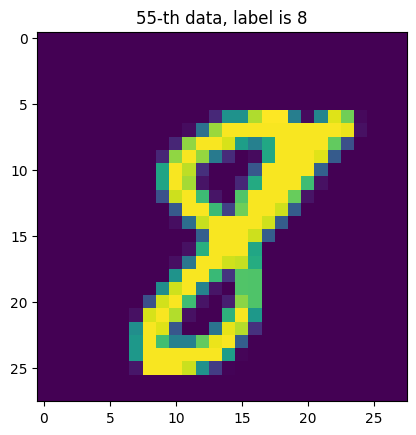

In [5]:
import matplotlib.pyplot as plt
import numpy as np

idx=55
img = X_train[idx, :] #0번째 row
label = y_train[idx]
plt.figure()
plt.imshow(img)
plt.title('%d-th data, label is %d' % (idx, label))
plt.show()

## 검증 데이터셋 만들기

In [6]:
# 훈련데이터셋 -> 훈련(70%,42000), 검증(30%,18000) 분리

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=7)
print('X_train.shape', X_train.shape)
print('X_val.shape', X_val.shape)

X_train.shape (42000, 28, 28)
X_val.shape (18000, 28, 28)


## 모델 입력을 위한 데이터(손글씨) 전처리

*   2차원 배열(28,28)-> 1차원(784) 으로 변경
*   스케일링(범위축소) -> 0 ~ 255 -> 0 ~ 1



### 2차원 배열에서 1차원 배열로 변경

In [7]:
num_x_train = X_train.shape[0]
num_x_val = X_val.shape[0]
num_x_test = X_test.shape[0]

print(num_x_train,num_x_val,num_x_test)

42000 18000 10000


In [8]:
X_train = X_train.reshape(num_x_train, 28 * 28)
X_train.shape

(42000, 784)

In [9]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  31 196 254  40   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   4 136 253 251  38   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  11 175 253 253 193   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  22 133 157 253 193   0   0   0   0   0   0   

In [10]:
X_val = X_val.reshape(num_x_val, 28 * 28)
X_val.shape

(18000, 784)

In [11]:
X_test = X_test .reshape(num_x_test, 28 * 28)
X_test.shape

(10000, 784)

### 데이터 스케일링(범위축소)

In [12]:
# 데이터의 범위가 동일(0~255) ->(0,1) MixMax 표준환

In [13]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## 모델 입력을 위한 레이블 (정답) 전처리

In [14]:
from keras.utils import to_categorical

print(y_train.shape, y_train[0])

# 수치형 데이터 (0~9) -> 범주형 데이터 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train.shape, y_train[0])

(42000,) 1
(42000, 10) [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
y_train[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

## 모델 구성하기

In [16]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,))) # 첫번째 레이어 -> 반드시 입력을 넣어줘야함
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) #마지막 레이어-> 출력(레이블 shape과 동일)


## 모델 설정하

In [17]:
model.compile(optimizer='adam',  #옵티마이저
              loss = 'categorical_crossentropy',  # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

## 모델 학습하기

In [18]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 10s 21ms/step - loss: 0.4748 - acc: 0.8708 - val_loss: 0.2467 - val_acc: 0.9291
Epoch 2/30
329/329 [==============================] - 4s 13ms/step - loss: 0.2027 - acc: 0.9406 - val_loss: 0.1993 - val_acc: 0.9434
Epoch 3/30
329/329 [==============================] - 4s 12ms/step - loss: 0.1568 - acc: 0.9538 - val_loss: 0.1620 - val_acc: 0.9542
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 0.1302 - acc: 0.9612 - val_loss: 0.1456 - val_acc: 0.9582
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1086 - acc: 0.9675 - val_loss: 0.1395 - val_acc: 0.9592
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.0942 - acc: 0.9711 - val_loss: 0.1328 - val_acc: 0.9614
Epoch 7/30
329/329 [==============================] - 6s 17ms/step - loss: 0.0819 - acc: 0.9754 - val_loss: 0.1294 - val_acc: 0.9620
Epoch 8/30
329/329 [==============================] - 3s 10ms/step - lo

## 모델 학습 결과 분석

*  Epoch 5 이후 과대적합 됨( 검증 데이터셋의 손실값은 상승하고, 훈련셋과 검증셋의 정확도의 거리가 점점 벌어짐)
*  5 까지만 학습시킨 모델로 평가 진행

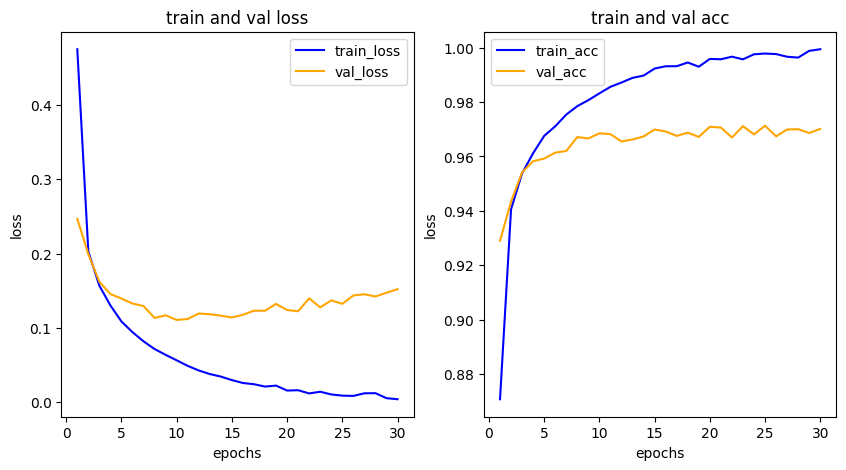

In [19]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [20]:
# 위 train and val acc 는 과적된 형태

# 모델 수정 및 학습

In [21]:
# 모델구성
md_model = Sequential()
md_model.add(Dense(64, activation='relu', input_shape=(784,))) # 첫번째 레이어 -> 반드시 입력을 넣어줘야함
md_model.add(Dense(32, activation='relu'))
md_model.add(Dense(10, activation='softmax')) #마지막 레이어-> 출력(레이블 shape과 동일)

# 모델 설정
md_model.compile(optimizer='adam',  #옵티마이저
              loss = 'categorical_crossentropy',  # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

# 모델 학습
history = md_model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
329/329 [==============================] - 3s 6ms/step - loss: 0.5025 - acc: 0.8587 - val_loss: 0.2522 - val_acc: 0.9298
Epoch 2/5
329/329 [==============================] - 2s 5ms/step - loss: 0.2044 - acc: 0.9421 - val_loss: 0.1861 - val_acc: 0.9488
Epoch 3/5
329/329 [==============================] - 2s 5ms/step - loss: 0.1506 - acc: 0.9562 - val_loss: 0.1545 - val_acc: 0.9560
Epoch 4/5
329/329 [==============================] - 2s 5ms/step - loss: 0.1176 - acc: 0.9659 - val_loss: 0.1477 - val_acc: 0.9565
Epoch 5/5
329/329 [==============================] - 2s 7ms/step - loss: 0.0983 - acc: 0.9723 - val_loss: 0.1272 - val_acc: 0.9646


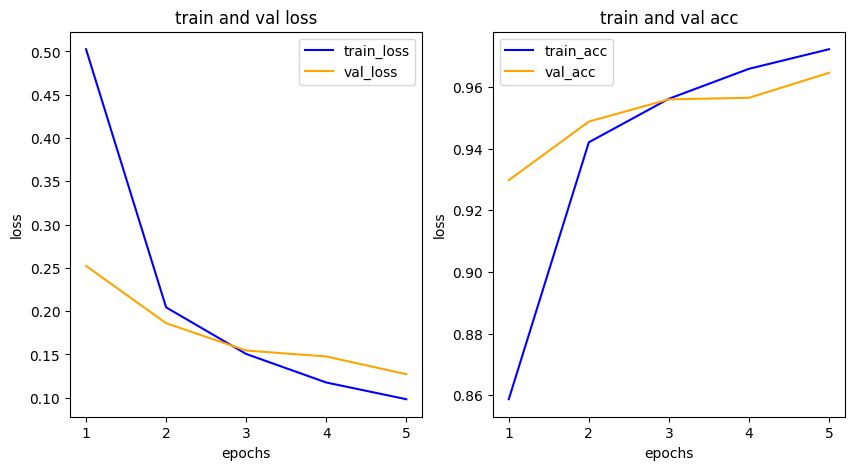

In [22]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

## 모델 평가하기

In [23]:
md_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1203 - acc: 0.9640


[0.12030729651451111, 0.9639999866485596]

### 예측값을 그려서 손글씨 확인하기

In [24]:
import numpy as np
np.set_printoptions(precision=7) # numpy 소수점 제한

results = model.predict(X_test)

print(results.shape)
print(f'각 클래스에 속할 확률 : \n{results[0]}')

313/313 [==============================] - 1s 2ms/step
(10000, 10)
각 클래스에 속할 확률 : 
[1.2462392e-12 1.4571249e-14 4.0430402e-12 3.0680550e-08 1.9552766e-16
 2.4496789e-13 8.1029269e-20 9.9999994e-01 4.2329525e-11 3.0401985e-12]


In [25]:
results = model.predict(X_test)
arg_results = np.argmax(results, axis = 1)
print(results[1], arg_results[1])
print(results.shape)
print(y_test[1])

313/313 [==============================] - 0s 1ms/step
[3.1504737e-14 2.5226532e-09 9.9999994e-01 8.2293374e-12 8.1200837e-24
 1.9792101e-10 1.5997763e-15 1.3126703e-24 6.1430708e-11 9.4798772e-24] 2
(10000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


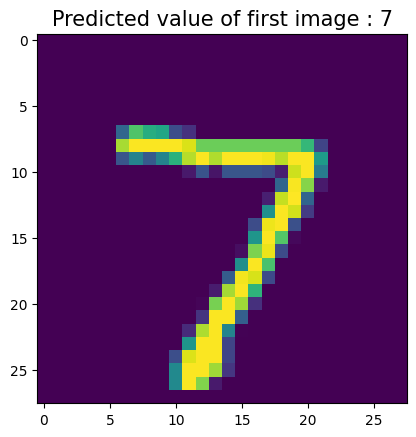

In [26]:
arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(X_test[0].reshape(28, 28))
plt.title('Predicted value of first image : ' + str(arg_results[0]), fontsize = 15)
plt.show()

313/313 [==============================] - 1s 2ms/step


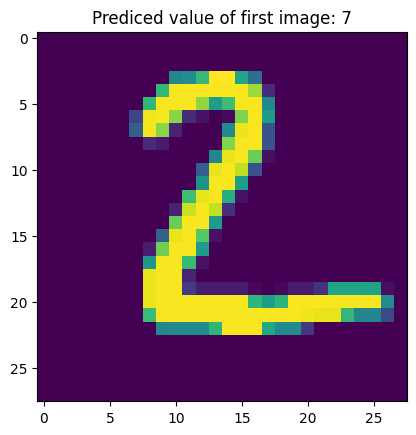

In [27]:
results = model.predict(X_test)
arg_results = np.argmax(results, axis = 1)

plt.imshow(X_test[1].reshape(28,28))
plt.title("Prediced value of first image: " + str(arg_results[0]))
plt.show()

## 모델 평가방법 - 혼동 행렬

*   정확도가 떨어지는 (헷갈리는) 손글씨 확인
*   숫자 5에 대한 데이터 추가수집하여 재학습



313/313 [==============================] - 1s 2ms/step


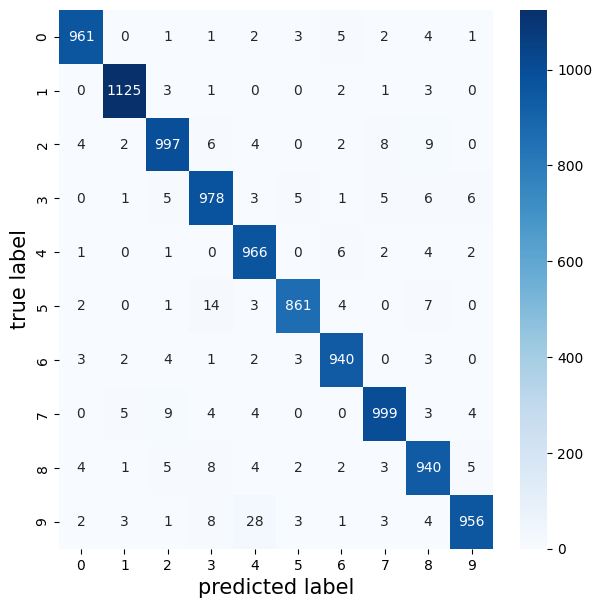

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델예측
y_pred = md_model.predict(X_test)

# 혼동 행렬
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label', fontsize = 15)
plt.ylabel('true label', fontsize = 15)
plt.show()

## 모델 평가 방법 - 분류 보고서

micro : 각각의 TP, FN, FP, TN 값들을 모두 합친 Total TP, FN, FP, TN 값들을 이용해 계산 <br>
macro : 각각의 클래스에 따라 TP, FN, FP, TN 값들을 이용해서 평가지표를 계산한 후 그 값들의 평균을 사용 <br>
weighted : 각 클래스에 해당하는 data 개수에 가중치를 주어 평균을 구하는 것

In [29]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.95      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [36]:
from sklearn import metrics
# 모델예측
results = md_model.predict(X_test)

y_pred = np.argmax(results, axis=1) # 예측
y_true = np.argmax(y_test, axis=1) # 실제 정답

pre_micro = metrics.precision_score(y_true, y_pred, average = 'micro')
pre_macro = metrics.precision_score(y_true, y_pred, average = 'macro')
pre_weighted = metrics.precision_score(y_true, y_pred, average = 'weighted')

print("precision_score")
print('micro: ',pre_micro )
print('macro: ',pre_macro)
print('weighted: ',pre_weighted)
print('-' * 50)

re_micro = metrics.recall_score(y_true, y_pred, average = 'micro')

re_macro = metrics.recall_score(y_true, y_pred, average = 'macro')

re_weighted = metrics.recall_score(y_true, y_pred, average = 'weighted')


print('recall_score')
print('micro :',re_micro)
print('macro :',re_macro)
print('weighted :',re_weighted)
print('-'*50)




f1_micro = metrics.f1_score(y_true, y_pred, average = 'micro')

f1_macro = metrics.f1_score(y_true, y_pred, average = 'macro')

f1_weighted = metrics.f1_score(y_true, y_pred, average = 'weighted')

print("f1_score")
print('f1micro: ',f1_micro )
print('f1macro: ',f1_macro)
print('f1weighted: ',f1_weighted)

313/313 [==============================] - 2s 5ms/step
precision_score
micro:  0.964
macro:  0.9639814904452664
weighted:  0.9641616184848731
--------------------------------------------------
recall_score
micro : 0.964
macro : 0.9636429960815913
weighted : 0.964
--------------------------------------------------
f1_score
f1micro:  0.964
f1macro:  0.9636911603699844
f1weighted:  0.9639606095147255
